## End-to-End ML Deployment Project
### Customer Churn Prediction in Telco
**IBM Sample Data sets** from: *https://www.kaggle.com/datasets/blastchar/telco-customer-churn*

Aim: 
- Predict behaviour to **retain customers** in telephone company `Telco`. 
- You can analyze all relevant customer data and **develop focused customer retention programs**.

The data is provided in the csv file `WA_Fn-UseC_-Telco-Customer-Churn.csv`.

Each row represents a customer, each column contains the customer’s attributes described in the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called `"Churn"`.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

- **NEXT STEPS**: 
    - **MLflow** Experimental Tracking
    - Data Visualisation on Application (**Streamlit**)
    - Scripts Cleaning + Division
    - Repo Packaging (**Docker**)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/cleaned/cleaned_telco_churn_data_20250821_142727.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,7590-VHVEG,F,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,1,5575-GNVDE,M,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,2,3668-QPYBK,M,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,3,7795-CFOCW,M,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,4,9237-HQITU,F,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [38]:
df = pd.read_parquet("../data/engineered_features/churn_v1_train_engineered_features.parquet")
df.head()

,tenure,MonthlyCharges,gender_F,gender_M,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.255392,-0.174760,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.610432,1.710993,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,1.529309,1.652688,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.677520,0.844746,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,1.610432,0.016814,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0


- **Insights**

1. **`Fiber Optic`** Has the **Highest Churn Rate**:
    
    - May indicate poor service quality, pricing, reliability issues

2. **`DSL`** Customers **Churn Less**:

    - May indicate more stable pricing or customer loyalty. 


- **EDA**
    - Data **Visualisation**

Q: **When** do customers churn?

c:\Users\tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


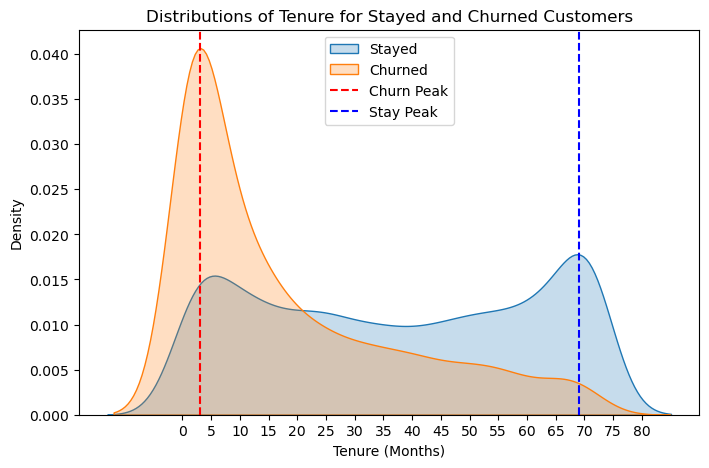

In [ ]:

# Outputs: ../reports_app/*.png

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



- **Insights**
1. **High Churn Rates** Around the First 5 Months (i.e. **the first half year**):
    
    - May indicate unsatisfactory service, better competitor offers, or poor onboarding

2. Stable Long-Term Customers:

    - A second peak around 60-70 months (i.e. the sixth year) for retained customers suggests **loyal customers tend to stay long-term**.

    - Encouraging long-term contracts may **reduce churn**.

3. Longer Tenure, Lower Churn:

    - Customers with **`tenure`** > around 24 months (i.e. **two years**) start to have a **lower churn rate**.

    - **Retention strategies** should **focus on the first few months**.


Q: Do the **`Contract`** Type & **`MonthlyCharges`** affect churn rate?

=== Chi-Square Test ===

Contingency Table:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Chi2 stat: 1184.60
Degrees of freedom: 2
p-value: 5.863038e-258

Expected frequencies:
 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]

=== Kruskal-Wallis Test ===

H-stat: 240.342632
p-value: 3.311286e-54


- Chi-Square Test of **Independence**
    - `Contract` type has a **statistically significant association** with churn (χ² test, p < 0.05)
    - `Month-to-Month` customers churn disproportionately more

- **KW** Test

    - There is a **statistically significant difference in median** monthly charges between churned and non-churned customers (KW test, p < 0.05)

- **Insights**
1. **`Churned`** Customers **Pay More Monthly Charges**:
    
    - May indicate poor service quality, pricing, reliability issues

2. **`Churned`** Customers Have a **Lower Total Charge**:

    - May indicate that **newer customers** who haven't accumulated high total charges **tend to churn more**.


- ML **Preprocessing**
    - **Train-Test Split** (can be **skipped**)

- **Feature Engineering**

- Customer Segragation
    - **Baseline** Model: **KMeans** Clustering

In [16]:
import pandas as pd

train_df = pd.read_parquet("../data/ML_Preprocessed/churn_v1_val.parquet")
feature_df = pd.read_parquet("../data/engineered_features/churn_v1_train_engineered_features.parquet")
feature_df.head()

,tenure,MonthlyCharges,gender_F,gender_M,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.255392,-0.174760,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.610432,1.710993,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,1.529309,1.652688,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.677520,0.844746,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,1.610432,0.016814,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0


- **HDBSCAN**
    - **Hyperparameter Tuning** (can be **skipped**)

In [17]:
hp_df = pd.read_csv("../data/reports/HDBSCAN_tuning.csv")
hp_df[hp_df["clusters"] == 3].head()

,Unnamed: 0,n_neighbors,min_dist,n_components,min_cluster_size,cluster_selection_method,metric,clusters,noise%,silhouette,persistence
18,4,10,0.0,20,500,eom,cosine,3,10.3,0.705,[0.472 0.486 0.529]
19,2,10,0.0,10,600,eom,cosine,3,10.3,0.705,[0.467 0.343 0.461]
20,0,10,0.0,10,500,eom,cosine,3,10.3,0.705,[0.481 0.519 0.544]
21,6,10,0.0,20,600,eom,cosine,3,10.3,0.705,[0.471 0.314 0.42 ]
24,20,15,0.0,20,500,eom,cosine,3,10.3,0.674,[0.541 0.411 0.402]


c:\Users\tseng\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tseng\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tseng\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== HDBSCAN results ===
clusters=3, noise=10.30% (464), silhouette=0.705, cluster_pers=[0.48114492 0.51909669 0.54355188]


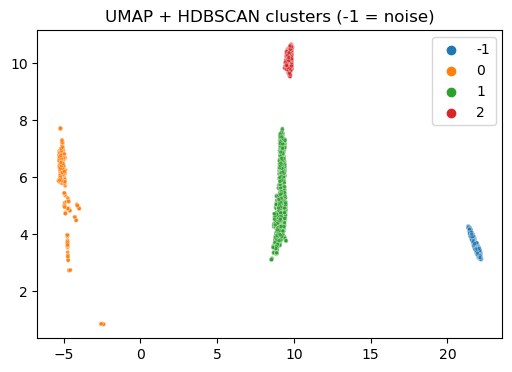

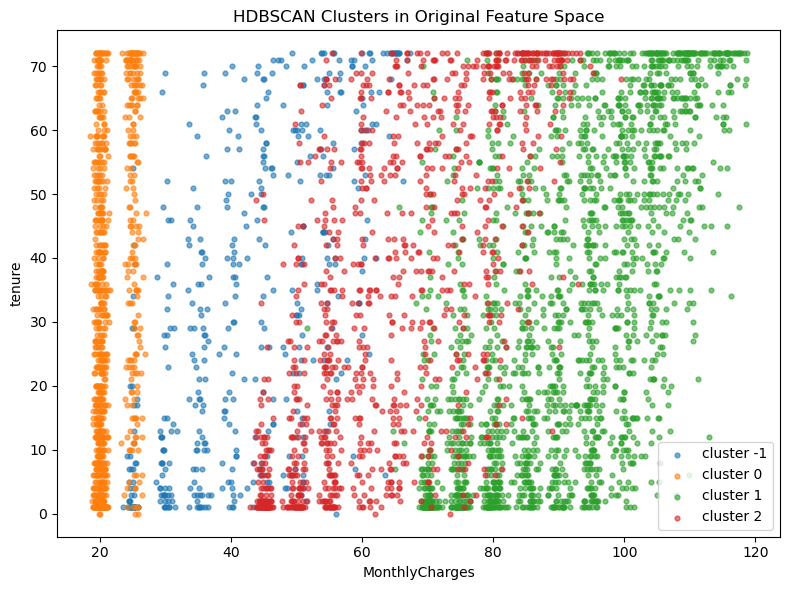

            n  churn_rate  tenure_med  monthly_mean  prop_pct
cluster                                                      
-1        464       0.250        29.0        42.406      10.3
 0        970       0.075        24.0        21.111      21.5
 1       1995       0.418        30.0        91.174      44.3
 2       1078       0.161        30.5        64.504      23.9


c:\Users\tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


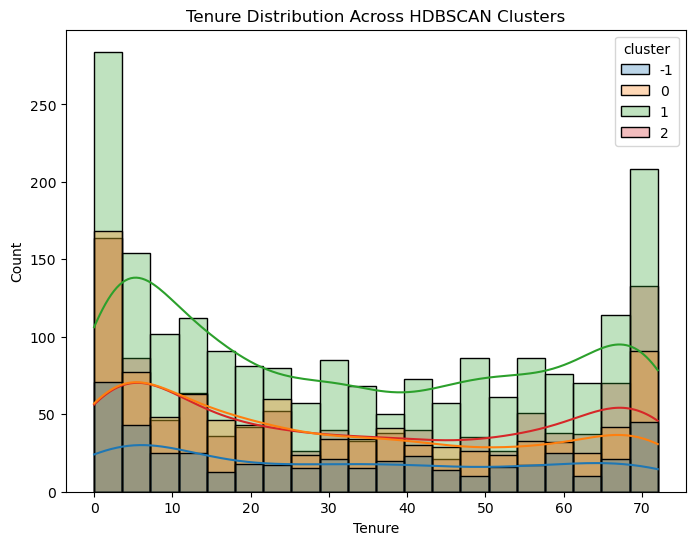

c:\Users\tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


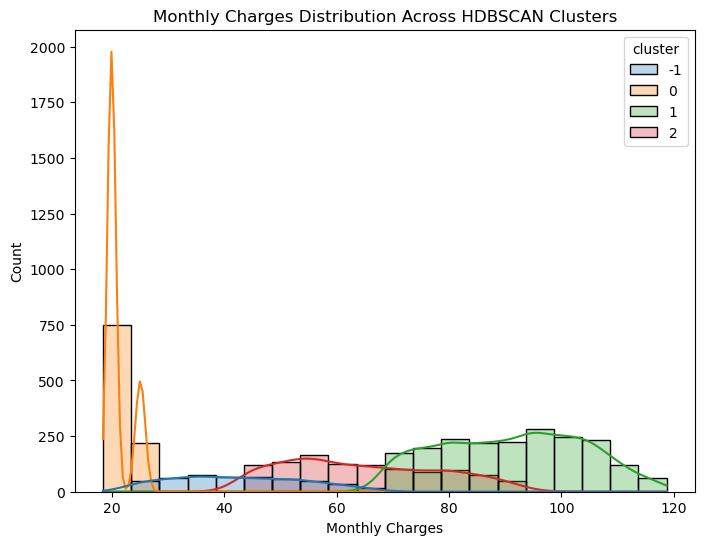

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,cluster,prob,prob_label,cluster_label
0,M,0,No,No,26,Yes,No,DSL,No,No,...,Yes,No,One year,No,Credit card (automatic),59.45,2,1.000000,0.8-1.0,Balanced Mainstream
1,M,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,1,1.000000,0.8-1.0,At-Risk Premiums
2,M,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),114.30,1,0.861615,0.8-1.0,At-Risk Premiums
3,M,1,Yes,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Month-to-month,No,Credit card (automatic),90.05,1,0.956887,0.8-1.0,At-Risk Premiums
4,F,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),65.20,-1,0.000000,NaN,Drifters


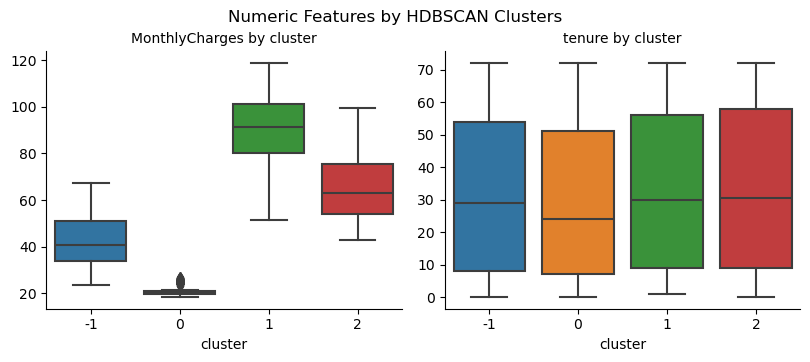

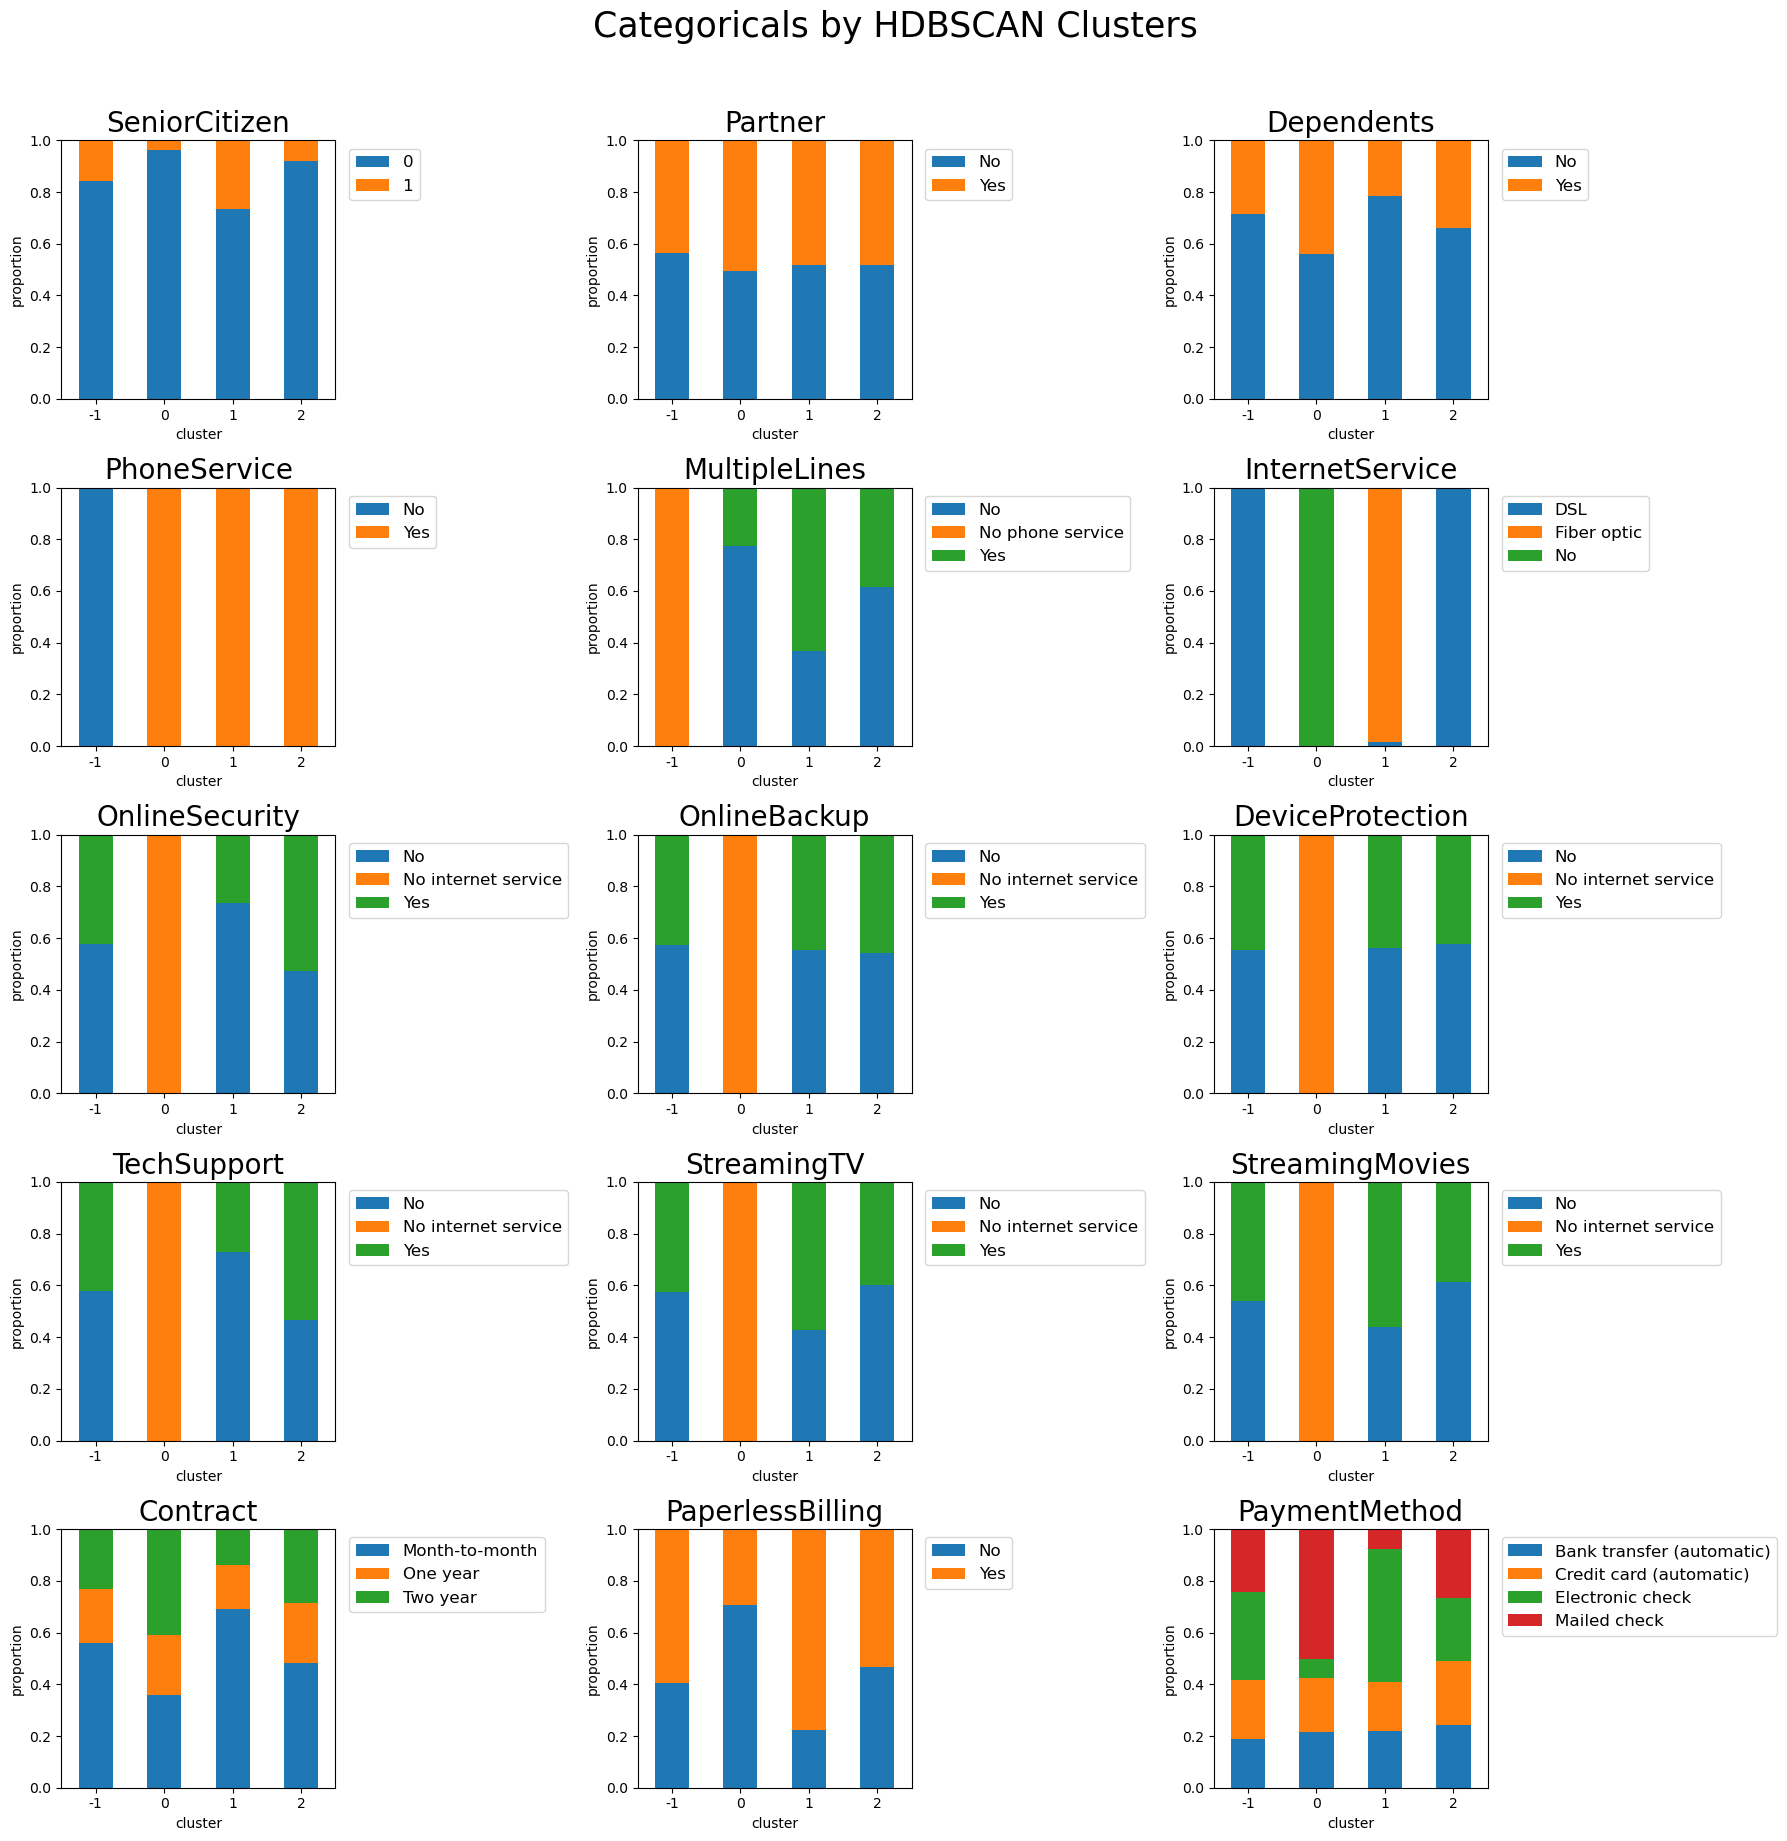

- **Further Insights** from Categorical Variable after HDBSCAN
1. **`Budget Loyalists`** Customers (Cluster 0):
    
    - Services/Support: NO `InternetService`, `StreamingTV`, `OnlineSecurity` (a) etc.
    - `PaymentMethod`: More `Mailed Check` (b)
        - Conclusion: **Cost-conscious** customers, minimal services
        - (a + b): **STABLE** segment

2. **`At-Risk Premiums`** Customers (Cluster 1):

    - `InternetService`: Almost ALL `Fibre Optic` (a)
    - `Contract`: Skewed towards `Month-to-Month` (b)
    - `PaymentMethod`: Tilt towards `Electronic Check` (c)
        - Conclusion: **Tech-heavy**, **service-loaded** customers
        - They spent the MOST but **volatile** (V. HIGH churn risk)
        - (a + b + c): **HIGH** churn segment!!!

3. **`Balanced Mainstream`** Customers (Cluster 2)

    - `InternetService`: `DSL`
    - Services: **Moderate** uptake of ALL services
    - `PaymentMethod`: Diverse
        - Conclusion: Mid-spending, moderately loyal group

4. **`Drifters`** Customers (Cluster -1)

    - `InternetService`: `DSL`
    - NO `PhoneService` 

- **Baseline** Model Testing

F1: 0.614
ROC AUC: 0.839
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



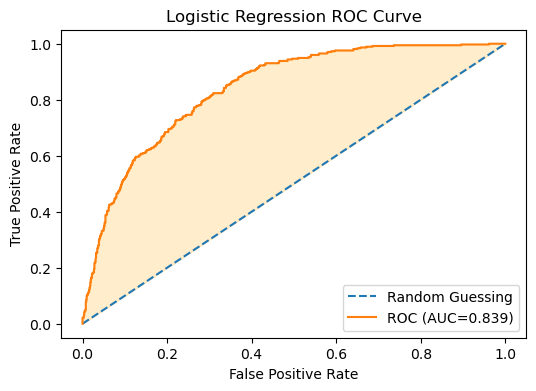

- **Advanced** Model Training & **Hyperparameter Tuning**

[LogisticRegression] CV F1: 0.625 ± 0.011 | CV ROC AUC: 0.842 ± 0.009
[LogisticRegression] TEST F1@thr*=0.449: 0.615 | TEST ROC AUC: 0.839
[LogisticRegression] classification_report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1035
           1       0.49      0.82      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409

[RandomForest] best params: {'clf__n_estimators': 600, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 4, 'clf__max_features': 'log2', 'clf__max_depth': None}
[RandomForest] CV F1: 0.634 ± 0.011 | CV ROC AUC: 0.840 ± 0.007
[RandomForest] TEST F1@thr*=0.368: 0.621 | TEST ROC AUC: 0.837
[RandomForest] classification_report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.79      1035
           1       0.49      0.84      0.62       

c:\Users\tseng\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[XGBoost] best params: {'clf__subsample': 0.8, 'clf__n_estimators': 200, 'clf__min_child_weight': 3, 'clf__max_depth': 8, 'clf__learning_rate': 0.01, 'clf__gamma': 1.0, 'clf__colsample_bytree': 0.6}
[XGBoost] CV F1: 0.630 ± 0.015 | CV ROC AUC: 0.839 ± 0.011
[XGBoost] TEST F1@thr*=0.370: 0.612 | TEST ROC AUC: 0.839
[XGBoost] classification_report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1035
           1       0.47      0.87      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.72      1409



In [ ]:
# --- Optional: soft-voting ensemble (uses tuned RF + XGB + LR) -----------------
# Refit tuned models from results


[Voting] CV F1: 0.632 ± 0.008 | CV ROC AUC: 0.844 ± 0.008
[Voting] TEST F1@thr*=0.438: 0.626 | TEST ROC AUC: 0.841
[Voting] classification_report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.74      0.76      1409



- **Visualising** Model **Performances**

=== Model summary ===
             Model    CV_F1  CV_ROC_AUC  Test_F1  Test_ROC_AUC
LogisticRegression 0.624510    0.842120 0.614770      0.839262
           XGBoost 0.629660    0.839144 0.612053      0.839059
      RandomForest 0.634265    0.840239 0.620825      0.837172


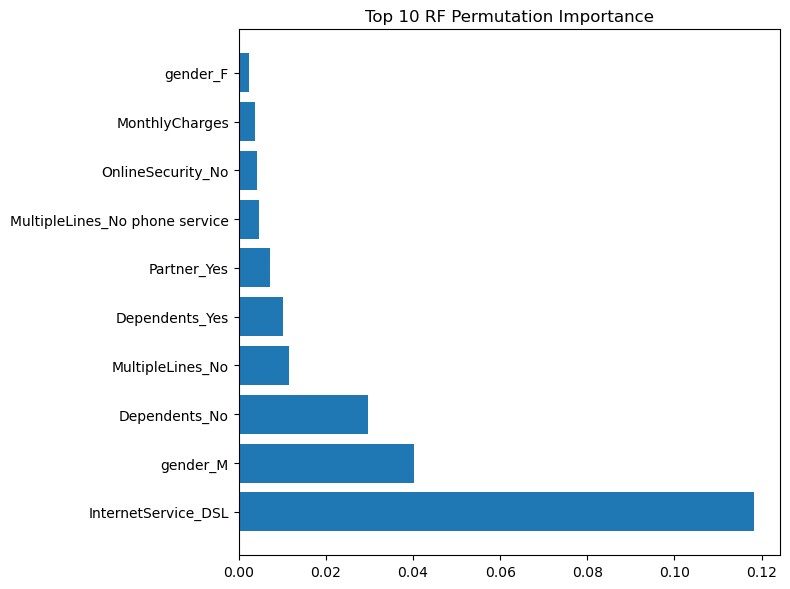

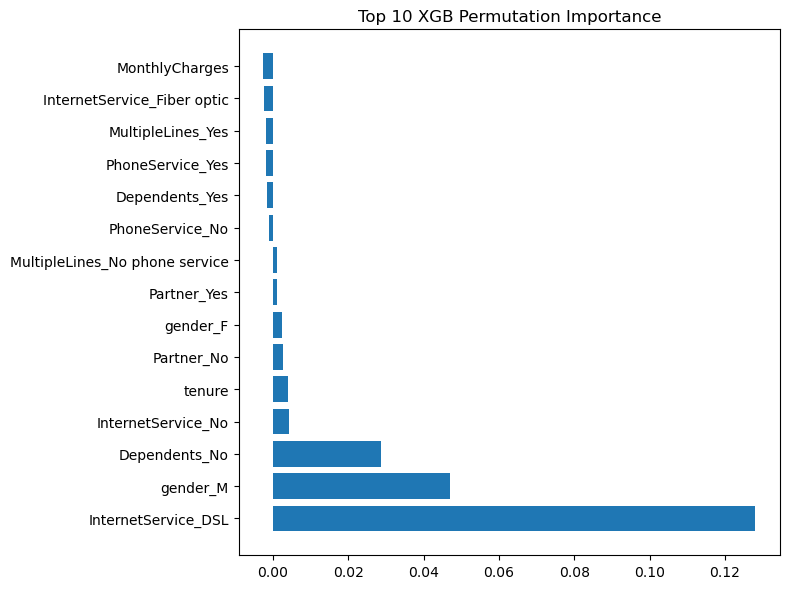

In [ ]:


from sklearn.inspection import permutation_importance

def get_feature_names_from_ct(ct):
    """Return feature names produced by a fitted ColumnTransformer."""
    names = []
    for name, trans, cols in ct.transformers_:
        if name == "remainder" and trans == "drop":
            continue
        if hasattr(trans, "get_feature_names_out"):
            # works for OneHotEncoder, StandardScaler (sklearn >=1.0)
            fn = trans.get_feature_names_out(cols)
        else:
            # passthrough or transformers without the method
            fn = np.asarray(cols, dtype=object)
        names.extend(fn)
    return np.array(names, dtype=object)

def plot_permutation_importance(pipeline, X, y, title, top_n=15):
    pre = pipeline.named_steps["preprocessor"]
    feat_names = get_feature_names_from_ct(pre)

    r = permutation_importance(pipeline, X, y, n_repeats=10,
                               scoring="f1", random_state=42, n_jobs=-1)
    imp = r.importances_mean
    order = np.argsort(imp)[::-1][:top_n]

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.barh(range(len(order)), imp[order])
    plt.yticks(range(len(order)), feat_names[order])
    plt.tight_layout()
    plt.show()

top_n = 10
# Example on held-out test set:
plot_permutation_importance(models_by_name["RandomForest"], X_test, y_test,
                            title=f"Top {top_n} RF Permutation Importance", top_n=top_n)
plot_permutation_importance(models_by_name["XGBoost"], X_test, y_test,
                            title=f"Top {top_n} XGB Permutation Importance")

- **Permutation** importances

    - Measures drop in model performance when a feature is randomly shuffled.

    - **Strengths**: directly tied to **predictive performance**.

    - **Weaknesses**:

         - Sensitive to **correlated features**: if feature A is highly correlated with feature B, shuffling A might not hurt performance much (since B carries similar info) → falsely low importance.

        - More **computationally expensive**.

- **Business Insights**

**`MonthlyCharges`** is the most crucial predictors in common, followed by `tenre`, `gender` and `MultipleLines`:

1. Again, prove that the charges paid by the customers affect their `churn` rate.
    
2. Consider re-evaluating pricing plans or offering early discounts to high-risk customers.

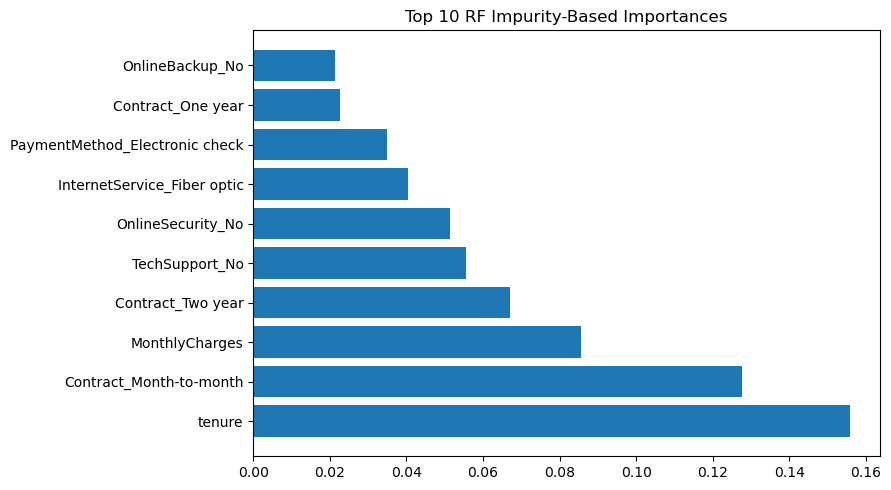

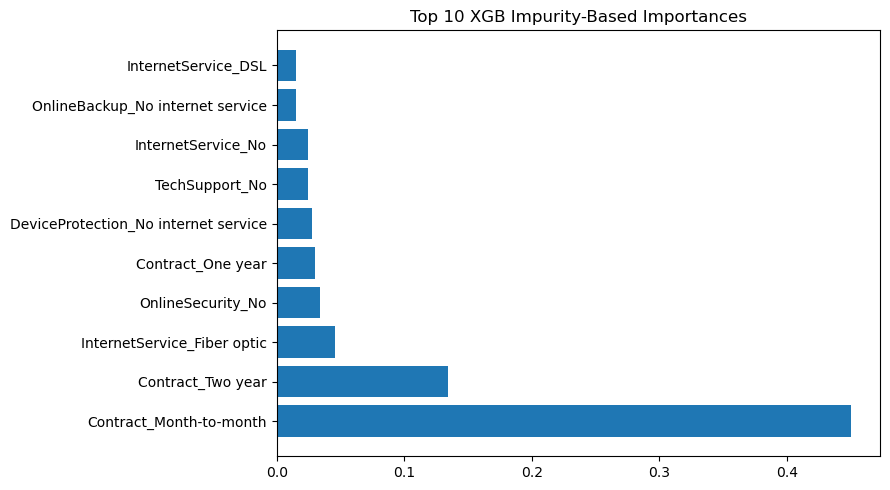

In [24]:
def plot_tree_feature_importances(pipeline, title, top_n=15):
    # extract fitted pieces
    pre = pipeline.named_steps["preprocessor"]
    clf = pipeline.named_steps["clf"]
    if not hasattr(clf, "feature_importances_"):
        print("Estimator has no feature_importances_.")
        return
    feat_names = get_feature_names_from_ct(pre)
    imp = clf.feature_importances_
    order = np.argsort(imp)[::-1][:top_n]

    plt.figure(figsize=(9, 5))
    plt.title(title)
    plt.barh(range(len(order)), imp[order])
    plt.yticks(range(len(order)), feat_names[order], rotation=0)
    plt.tight_layout()
    plt.show()

# after tune_and_eval runs
models_by_name = {nm: m for nm, m, *_ in results}

plot_tree_feature_importances(models_by_name["RandomForest"],
                              top_n=top_n, title=f"Top {top_n} RF Impurity-Based Importances")
plot_tree_feature_importances(models_by_name["XGBoost"],
                              top_n=top_n, title=f"Top {top_n} XGB Impurity-Based Importances")

- **Impurity-based** importances (Gini/Entropy/XGB gain)

    - Computed during tree building: how much a feature reduces impurity (or gain) across all splits.

    - **Strengths**: very fast, comes “for free.”

    - **Weaknesses**:

        - Biased towards **continuous** / high-cardinality features (e.g. tenure, MonthlyCharges).

        - Can give **inflated** importance to **correlated variables**.

        - **Doesn’t measure true predictive power**, just split frequency/quality.

- **SHAP** for Feature Importances

C:\Users\tseng\AppData\Local\Temp\ipykernel_16068\2160848174.py:117: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv_rf_cls1, Xrf, feature_names=rf_names,


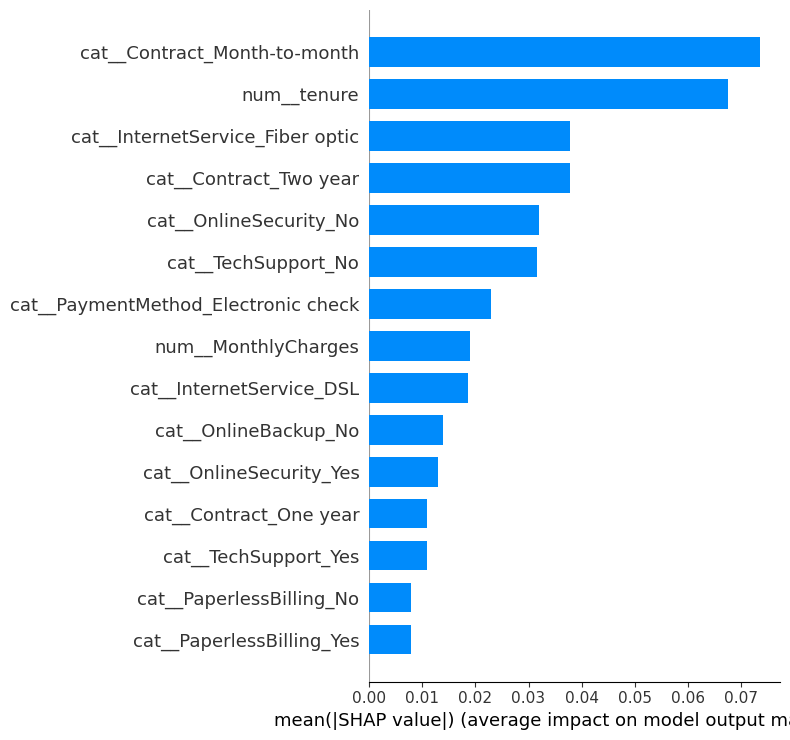

C:\Users\tseng\AppData\Local\Temp\ipykernel_16068\2160848174.py:119: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv_rf_cls1, Xrf, feature_names=rf_names,


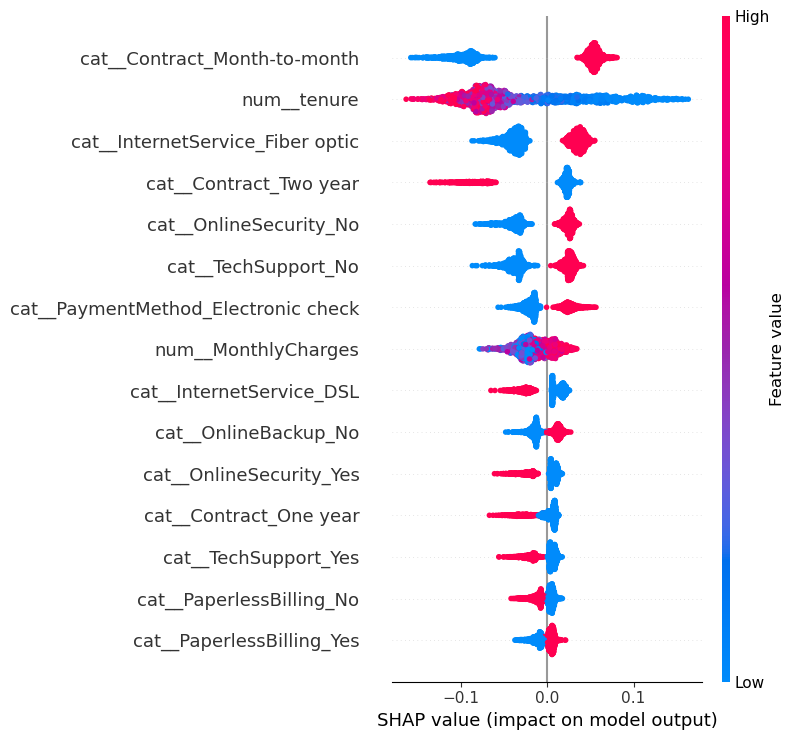

 98%|===================| 1964/2000 [00:36<00:00]        C:\Users\tseng\AppData\Local\Temp\ipykernel_16068\2160848174.py:144: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv_xgb_cls1, Xxgb, feature_names=xgb_names,


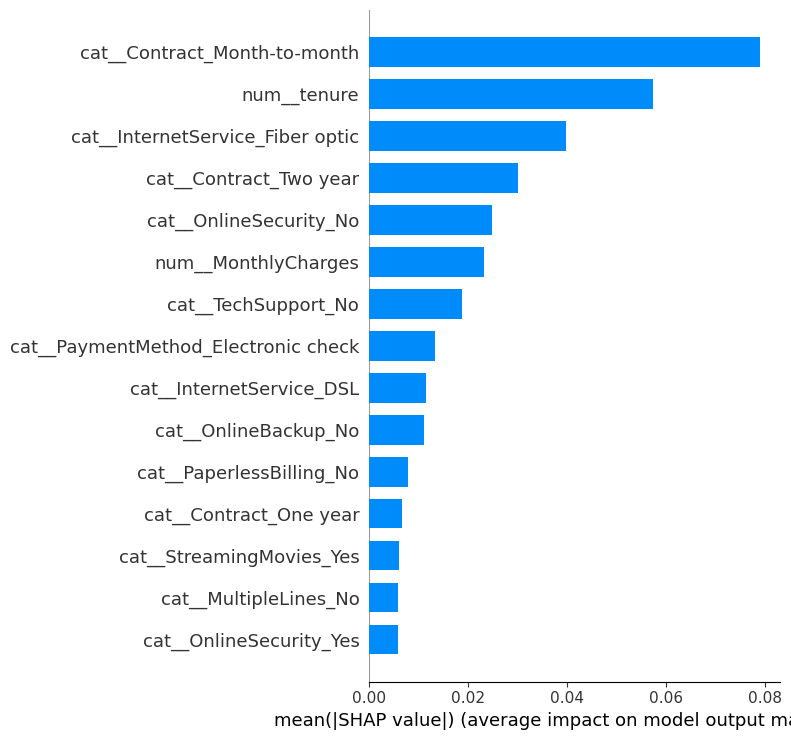

C:\Users\tseng\AppData\Local\Temp\ipykernel_16068\2160848174.py:146: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv_xgb_cls1, Xxgb, feature_names=xgb_names,


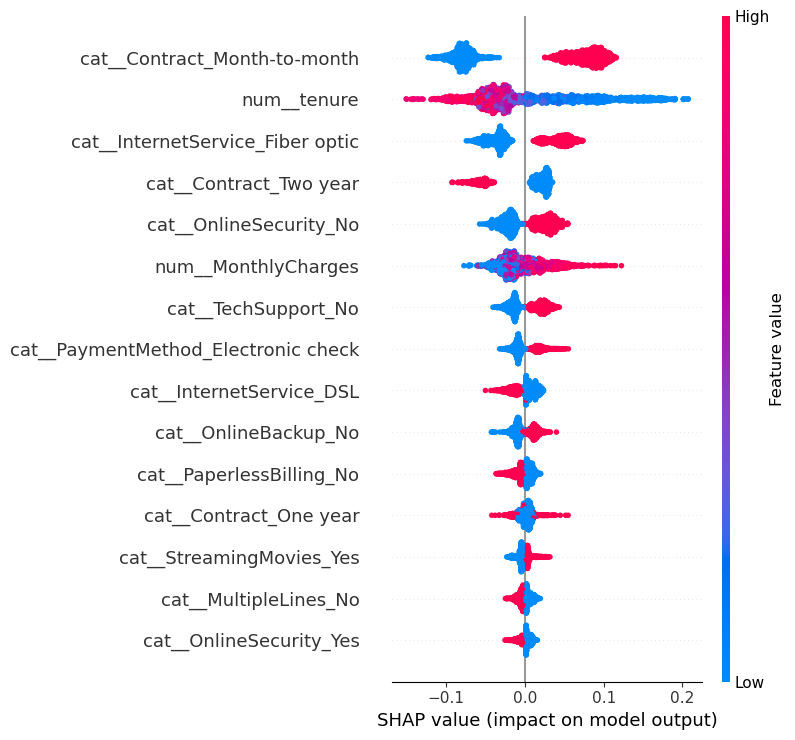

- **SHAP** (Shapley values for features)

    - Comes from game theory: each feature’s contribution is measured by averaging across all possible coalitions of features.

    - Strengths:

        - Theoretically sound: guarantees local accuracy, consistency, additivity.

        - Handles correlation **better than permutation** (though not perfectly).

        - Provides both **global importance** (summary plots) and **local explanations** (force/waterfall plots).

    - Weaknesses:

        - Can be slow on large datasets (though tree models have fast algorithms).

        - Still not immune to correlated feature issues, but far less biased than impurity or permutation.

- 🔹 So is SHAP the “best”?

If you want a single go-to method: ✅ Yes, SHAP is usually the most trustworthy.

- But the best practice is **triangulation**:

    - Use **impurity**-based for a quick **sanity check**.

    - Use **permutation** for **predictive relevance**.

    - Use **SHAP** for **robust**, interpretable attributions (both global + local).

- Think of it like this:

    - Impurity = “what the model looked at most.”

    - Permutation = “what the model needs to predict.”

    - SHAP = “what each feature contributed to each prediction in a fair, consistent way.”

- **Waterfall** Plots

[idx=1685] predict_proba(class=1): 0.617


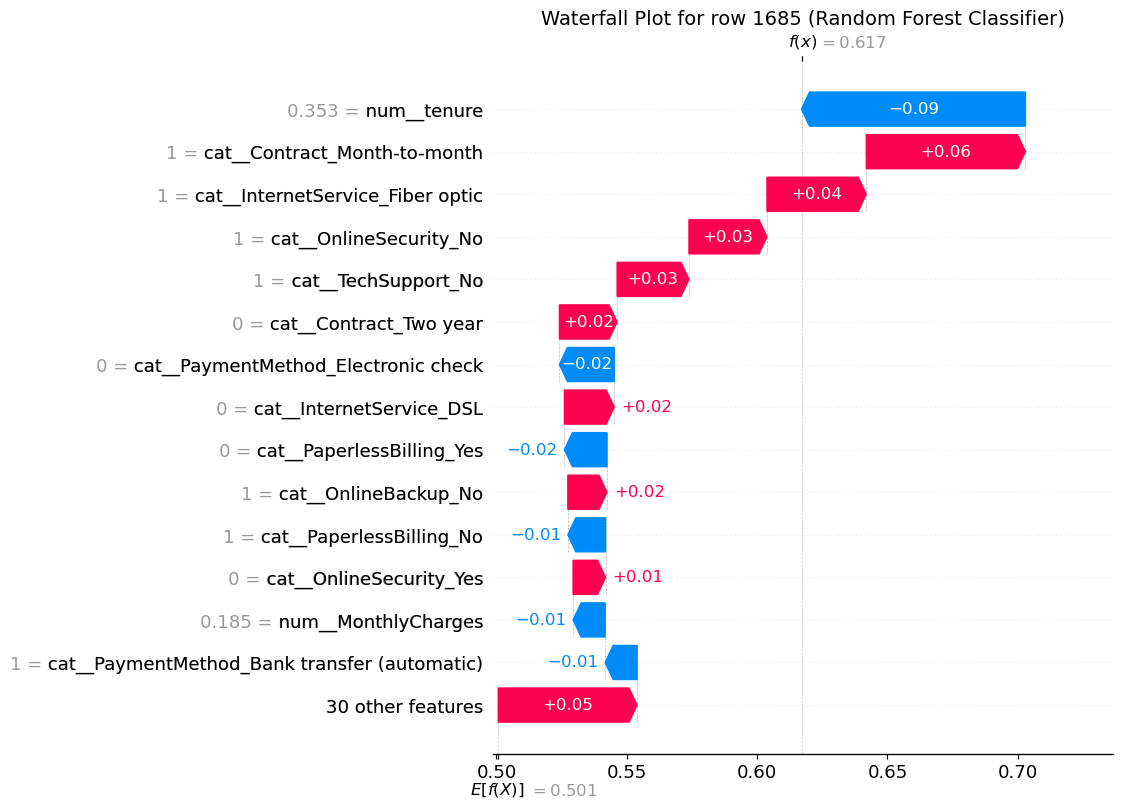

[idx=1685] predict_proba(class=1): 0.633


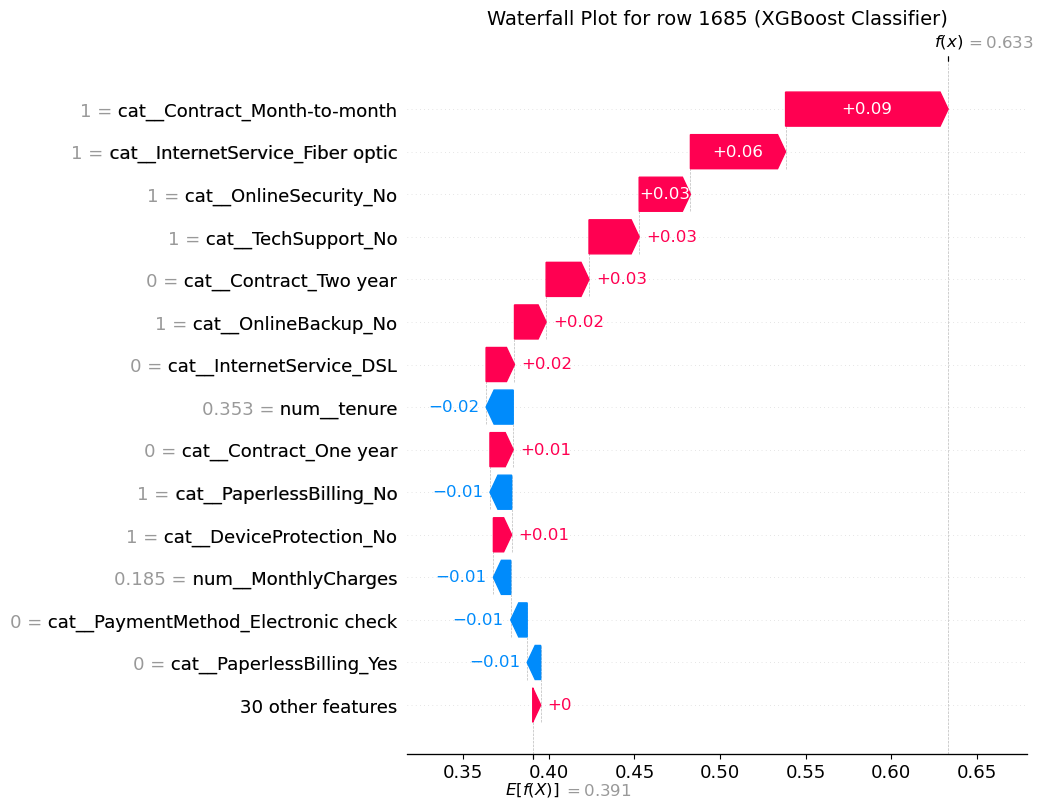

In [ ]:
# scripts/plot_SHAP_waterfall_plots.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import joblib
from src.myproject.utils.paths import FEATURE_DATA, MODELS_DIR

# ---------- helpers ----------
def get_feature_names_from_ct_safe(ct, X_sample=None):
    """
    Return feature names produced by a ColumnTransformer.
    Works across scikit-learn versions and with passthrough.
    """
    # Newer sklearn exposes this directly
    try:
        names = ct.get_feature_names_out()
        return np.asarray(names, dtype=object)
    except Exception:
        pass

    names = []
    input_cols = list(X_sample.columns) if hasattr(X_sample, "columns") else None

    for name, trans, cols in ct.transformers_:
        if name == "remainder" and trans == "drop":
            continue

        # Resolve column names if indices/slices are used
        if input_cols is not None and not isinstance(cols, (list, tuple, np.ndarray)):
            # slice / boolean mask
            if isinstance(cols, slice):
                cols = input_cols[cols]
            else:
                # e.g. 'passthrough' may give np.array of indices
                cols = [input_cols[i] for i in cols]

        if hasattr(trans, "get_feature_names_out"):
            try:
                fn = trans.get_feature_names_out(cols)
            except Exception:
                fn = np.asarray(cols, dtype=object)
        else:
            fn = np.asarray(cols, dtype=object)

        names.extend(fn)

    return np.asarray(names, dtype=object)

def transform_for_shap(pipeline, X):
    pre = pipeline.named_steps["preprocessor"]
    Xt = pre.transform(X)
    if hasattr(Xt, "toarray"):  # sparse -> dense
        Xt = Xt.toarray()
    feat_names = get_feature_names_from_ct_safe(pre, X_sample=X)
    # Final sanity: names must match transformed width
    if len(feat_names) != Xt.shape[1]:
        feat_names = np.array([f"f{i}" for i in range(Xt.shape[1])], dtype=object)
    return Xt, feat_names

def ensure_shapes_trim_bias(shap_vals, n_features):
    """
    Trim any extra bias column and return shapes aligned to (N, F)
    or list-of-arrays with each (N, F).
    """
    # SHAP may return a list (one per class)
    if isinstance(shap_vals, list):
        return [sv[:, :n_features] for sv in shap_vals]

    sv = np.asarray(shap_vals)
    if sv.ndim == 3:
        # Either (C, N, F[+1]) or (N, F[+1], C). Keep first n_features.
        if sv.shape[0] in (2, 3):        # (C, N, F[+1])
            sv = sv[:, :, :n_features]
        elif sv.shape[-1] in (2, 3):     # (N, F[+1], C)
            sv = sv[:, :n_features, :]
        else:
            # Fallback: assume axis=2 is feature axis
            sv = sv[:, :, :n_features]
        return sv

    # (N, F[+1]) or already (N, F)
    return sv[:, :n_features]

def pick_class1(shap_vals_cls_aligned):
    """
    Extract class-1 SHAP values across the possible layouts.
    Returns an (N, F) array.
    """
    if isinstance(shap_vals_cls_aligned, list):
        # list-of-arrays (len = n_classes)
        return shap_vals_cls_aligned[1]

    sv = np.asarray(shap_vals_cls_aligned)
    if sv.ndim == 3:
        if sv.shape[0] in (2, 3):        # (C, N, F)
            return sv[1]
        if sv.shape[-1] in (2, 3):       # (N, F, C)
            return sv[..., 1]
        # Unusual case—fallback to first axis as classes
        return sv[1]
    return sv  # already (N, F)

def plot_shap_summaries(X_train, rf_clf, xgb_clf):
    """ Plot SHAP summary (beeswarm) plots for given models and training data. """
    # ---------- choose a manageable sample ----------
    S = min(2000, len(X_train))
    X_sample = X_train.sample(S, random_state=42)

    # ---------- RandomForest (pipeline) ----------
    rf_est  = rf_clf

    Xrf, rf_names = transform_for_shap(rf_pipe, X_sample)

    expl_rf = shap.TreeExplainer(rf_est)
    sv_rf = expl_rf.shap_values(Xrf)
    sv_rf = ensure_shapes_trim_bias(sv_rf, Xrf.shape[1])
    sv_rf_cls1 = pick_class1(sv_rf)

    assert sv_rf_cls1.shape[1] == Xrf.shape[1] == len(rf_names), \
        f"RF mismatch: sv={sv_rf_cls1.shape}, X={Xrf.shape}, names={len(rf_names)}"

    shap.summary_plot(sv_rf_cls1, Xrf, feature_names=rf_names,
                    plot_type="bar", max_display=15, show=True)
    shap.summary_plot(sv_rf_cls1, Xrf, feature_names=rf_names,
                    max_display=15, show=True)

    # ---------- XGBoost (pipeline) ----------
    xgb_est  = xgb_clf

    Xxgb, xgb_names = transform_for_shap(xgb_pipe, X_sample)

    # use a small random subset of X for background (to keep it fast)
    Xxgb_bg = shap.sample(Xxgb, 200, random_state=42)   # 200 rows background

    expl_xgb = shap.TreeExplainer(
        xgb_est,
        data=Xxgb_bg,                      # background dataset required!
        feature_perturbation="interventional",
        model_output="probability"
    )
    sv_xgb = expl_xgb.shap_values(Xxgb)
    sv_xgb = ensure_shapes_trim_bias(sv_xgb, Xxgb.shape[1])
    sv_xgb_cls1 = pick_class1(sv_xgb)

    assert sv_xgb_cls1.shape[1] == Xxgb.shape[1] == len(xgb_names), \
        f"XGB mismatch: sv={sv_xgb_cls1.shape}, X={Xxgb.shape}, names={len(xgb_names)}"

    shap.summary_plot(sv_xgb_cls1, Xxgb, feature_names=xgb_names,
                    plot_type="bar", max_display=15, show=True)
    shap.summary_plot(sv_xgb_cls1, Xxgb, feature_names=xgb_names,
                    max_display=15, show=True)

def _get_base_value(explainer, class_idx: int):
    base_arr = np.atleast_1d(explainer.expected_value)
    # Some models (e.g., XGBoost binary) return a single baseline
    return base_arr[class_idx] if base_arr.size > 1 else float(base_arr[0])

def plot_waterfall_for_index(pipeline, explainer, X, idx, class_idx=1, feature_names=None,
                             show_pred=True, proba=True, max_display=15):
    X_one = X.iloc[[idx]]
    Xt_one, names = transform_for_shap(pipeline, X_one)
    if feature_names is None:
        feature_names = names

    sv = explainer.shap_values(Xt_one)
    sv = ensure_shapes_trim_bias(sv, Xt_one.shape[1])
    sv_cls = pick_class1(sv)
    sv_row = np.asarray(sv_cls[0]).ravel()

    base = _get_base_value(explainer, class_idx)

    clf = pipeline.named_steps["clf"]
    try:
        if show_pred:
            if proba and hasattr(clf, "predict_proba"):
                p = pipeline.predict_proba(X_one)[0, class_idx]
                print(f"[idx={idx}] predict_proba(class={class_idx}): {p:.3f}")
            elif hasattr(clf, "decision_function"):
                s = pipeline.decision_function(X_one)
                s = s[0] if np.ndim(s) else float(s)
                print(f"[idx={idx}] decision_function: {s:.3f}")
    except Exception:
        pass

    try:
        ex = shap.Explanation(
            values=sv_row,
            base_values=base,
            data=np.asarray(Xt_one[0]).ravel(),
            feature_names=feature_names
        )
        shap.plots.waterfall(ex, max_display=max_display)
    except Exception:
        shap.plots._waterfall.waterfall_legacy(
            base,
            sv_row,
            np.asarray(Xt_one[0]).ravel(),
            feature_names=feature_names,
            max_display=max_display,
            show=True
        )

row_idx = np.random.choice(len(X_sample))

# Random Forest
plt.title(f"Waterfall Plot for row {row_idx} (Random Forest Classifier)", fontsize=14)
plot_waterfall_for_index(rf_pipe, expl_rf, X_sample, row_idx, class_idx=1)


# XGBoost
plt.title(f"Waterfall Plot for row {row_idx} (XGBoost Classifier)", fontsize=14)
plot_waterfall_for_index(xgb_pipe, expl_xgb, X_sample, row_idx, class_idx=1)